In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
from google.colab import files
src = list(files.upload().values())[0]
open('myutils.py','wb').write(src)
import myutils

Saving myutils.py to myutils.py


In [4]:
path2data = "drive/MyDrive/ColabNotebooks/P lab/data"
sub_folder_jpg = "hmdb51_jpg"
path2ajpgs = os.path.join(path2data, sub_folder_jpg)

In [5]:
all_vids, all_labels, catgs = myutils.get_vids(path2ajpgs) 
len(all_vids), len(all_labels), len(catgs)

(6776, 6776, 51)

In [6]:
all_vids[0], all_labels[0], catgs[0]

('drive/MyDrive/ColabNotebooks/P lab/data/hmdb51_jpg/kick/American_History_X_kick_l_cm_np1_le_med_33',
 'kick',
 'kick')

In [7]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict

{'kick': 0,
 'smoke': 1,
 'hit': 2,
 'golf': 3,
 'sword_exercise': 4,
 'climb': 5,
 'ride_bike': 6,
 'swing_baseball': 7,
 'walk': 8,
 'sword': 9,
 'shoot_bow': 10,
 'hug': 11,
 'pushup': 12,
 'sit': 13,
 'jump': 14,
 'brush_hair': 15,
 'dive': 16,
 'ride_horse': 17,
 'turn': 18,
 'kiss': 19,
 'throw': 20,
 'eat': 21,
 'cartwheel': 22,
 'somersault': 23,
 'climb_stairs': 24,
 'pullup': 25,
 'shake_hands': 26,
 'pour': 27,
 'push': 28,
 'fencing': 29,
 'run': 30,
 'stand': 31,
 'chew': 32,
 'draw_sword': 33,
 'shoot_ball': 34,
 'kick_ball': 35,
 'clap': 36,
 'catch': 37,
 'punch': 38,
 'wave': 39,
 'flic_flac': 40,
 'handstand': 41,
 'fall_floor': 42,
 'drink': 43,
 'laugh': 44,
 'smile': 45,
 'dribble': 46,
 'shoot_gun': 47,
 'pick': 48,
 'situp': 49,
 'talk': 50}

In [8]:
idx_to_label_dict = {}
for key in labels_dict.keys():
    idx_to_label_dict[labels_dict[key]] = key
idx_to_label_dict

{0: 'kick',
 1: 'smoke',
 2: 'hit',
 3: 'golf',
 4: 'sword_exercise',
 5: 'climb',
 6: 'ride_bike',
 7: 'swing_baseball',
 8: 'walk',
 9: 'sword',
 10: 'shoot_bow',
 11: 'hug',
 12: 'pushup',
 13: 'sit',
 14: 'jump',
 15: 'brush_hair',
 16: 'dive',
 17: 'ride_horse',
 18: 'turn',
 19: 'kiss',
 20: 'throw',
 21: 'eat',
 22: 'cartwheel',
 23: 'somersault',
 24: 'climb_stairs',
 25: 'pullup',
 26: 'shake_hands',
 27: 'pour',
 28: 'push',
 29: 'fencing',
 30: 'run',
 31: 'stand',
 32: 'chew',
 33: 'draw_sword',
 34: 'shoot_ball',
 35: 'kick_ball',
 36: 'clap',
 37: 'catch',
 38: 'punch',
 39: 'wave',
 40: 'flic_flac',
 41: 'handstand',
 42: 'fall_floor',
 43: 'drink',
 44: 'laugh',
 45: 'smile',
 46: 'dribble',
 47: 'shoot_gun',
 48: 'pick',
 49: 'situp',
 50: 'talk'}

In [9]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(598, 598)

In [10]:
len(set(unique_labels))

5

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels)) 

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

538 538
60 60


In [12]:
train_ids[:3], train_labels[:3]

(['drive/MyDrive/ColabNotebooks/P lab/data/hmdb51_jpg/smoke/girl_smoking_a_cigarette_smoke_h_nm_np1_fr_med_0',
  'drive/MyDrive/ColabNotebooks/P lab/data/hmdb51_jpg/sword_exercise/Spanish_counters_to_Italian_fencing_sword_exercise_f_cm_np2_ri_bad_0',
  'drive/MyDrive/ColabNotebooks/P lab/data/hmdb51_jpg/sword_exercise/VERGIL_(DEVIL_MAY_CRY)_swinging_his_sword_sword_exercise_f_cm_np1_fr_med_3'],
 ['smoke', 'sword_exercise', 'sword_exercise'])

In [13]:
test_ids[:3], test_labels[:3]

(['drive/MyDrive/ColabNotebooks/P lab/data/hmdb51_jpg/smoke/smoking_2_smoke_h_cm_np1_ba_med_4',
  'drive/MyDrive/ColabNotebooks/P lab/data/hmdb51_jpg/hit/TV_Recycling_hit_f_cm_np1_fr_bad_4',
  'drive/MyDrive/ColabNotebooks/P lab/data/hmdb51_jpg/hit/Joey_Jordison_drum_solo_hit_u_cm_np1_ba_bad_0'],
 ['smoke', 'hit', 'hit'])

In [14]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import torch
import numpy as np
import random
np.random.seed(2020)
random.seed(2020)
torch.manual_seed(2020)

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):      
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)
        
        seed = np.random.randint(1e9)        
        frames_tr = []
        for frame in frames:
            random.seed(seed)
            np.random.seed(seed)
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [15]:
model_type = "rnn"    

timesteps =16
if model_type == "rnn":
    h, w =224, 224
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
else:
    h, w = 112, 112
    mean = [0.43216, 0.394666, 0.37645]
    std = [0.22803, 0.22145, 0.216989]

In [16]:
import torchvision.transforms as transforms

train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),  
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),    
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [17]:
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

538


In [18]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 224, 224]), 1, tensor(-2.1179), tensor(2.2318))

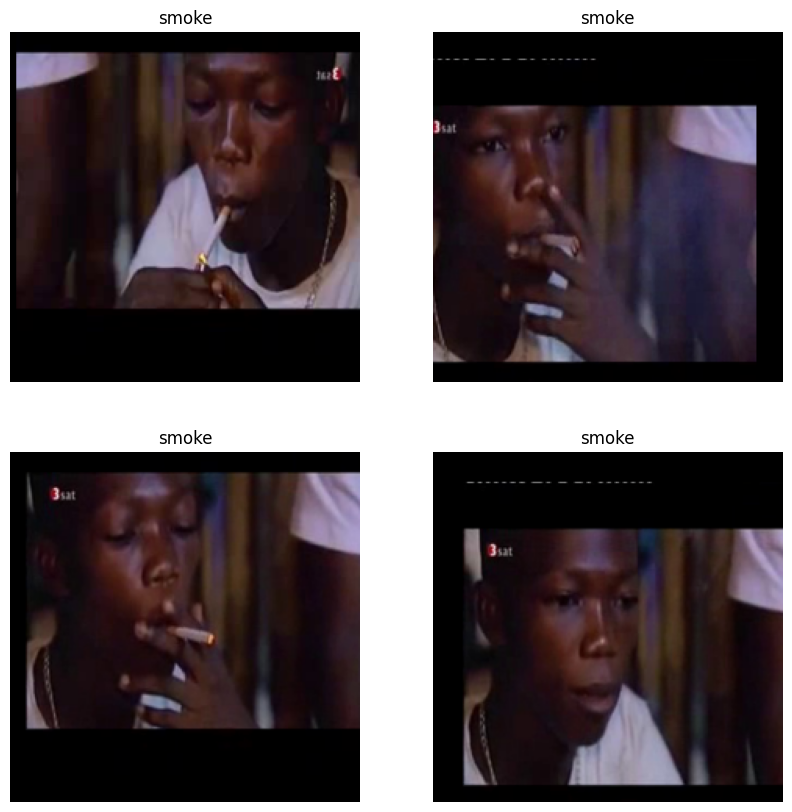

In [19]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(idx_to_label_dict[label])
    plt.axis('off')

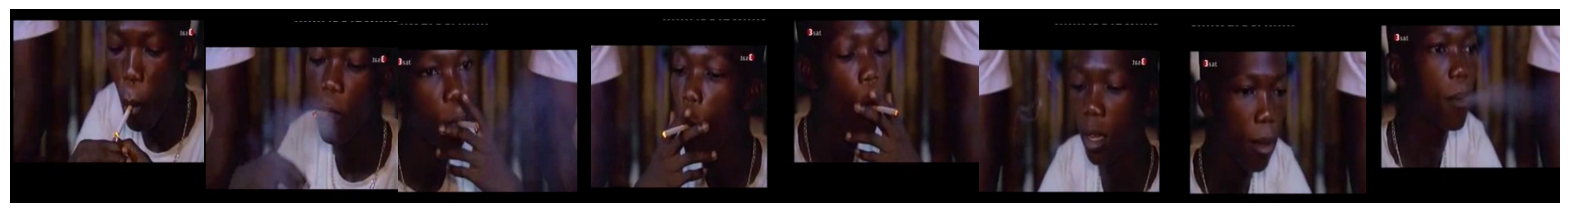

In [20]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::2]):
    plt.subplot(1,8,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.axis("off")

In [21]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ]) 
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

60


In [22]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 224, 224]), 0, tensor(-2.1179), tensor(2.0648))

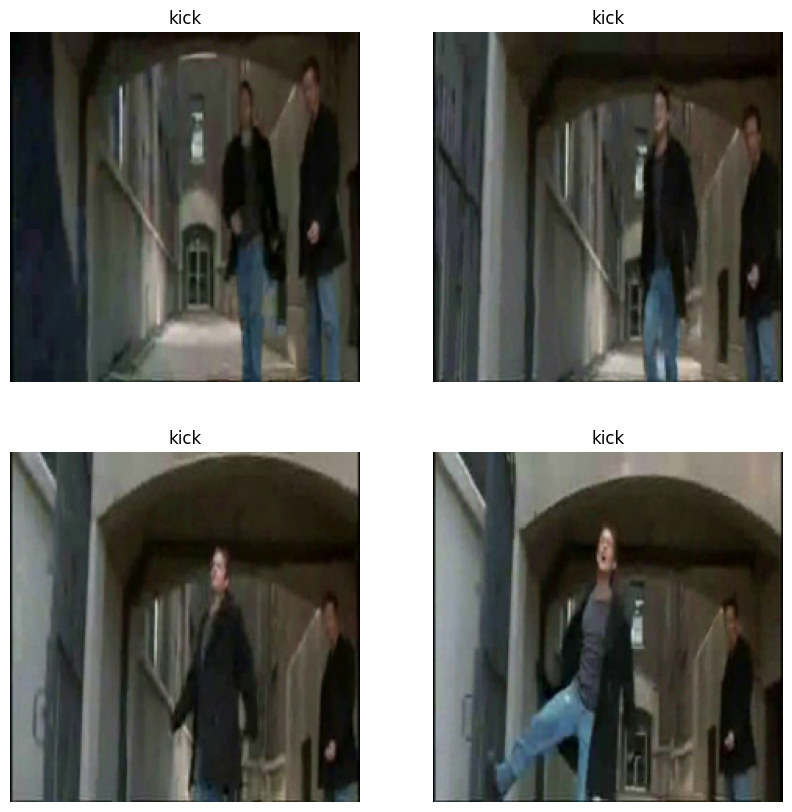

In [23]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(idx_to_label_dict[label])
    plt.axis('off')

In [24]:
def collate_fn_r3d_18(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    imgs_tensor = torch.transpose(imgs_tensor, 2, 1)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor

def collate_fn_rnn(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor
    

batch_size = 1
if model_type == "rnn":
    train_dl = DataLoader(train_ds, batch_size= batch_size,
                          shuffle=True, collate_fn= collate_fn_rnn)
    test_dl = DataLoader(test_ds, batch_size= batch_size,
                         shuffle=False, collate_fn= collate_fn_rnn)  
else:
    train_dl = DataLoader(train_ds, batch_size= batch_size,
                          shuffle=True, collate_fn= collate_fn_r3d_18)
    test_dl = DataLoader(test_ds, batch_size= batch_size,
                         shuffle=False, collate_fn= collate_fn_r3d_18)

In [25]:
for xb,yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([1, 16, 3, 224, 224]) torch.Size([1])


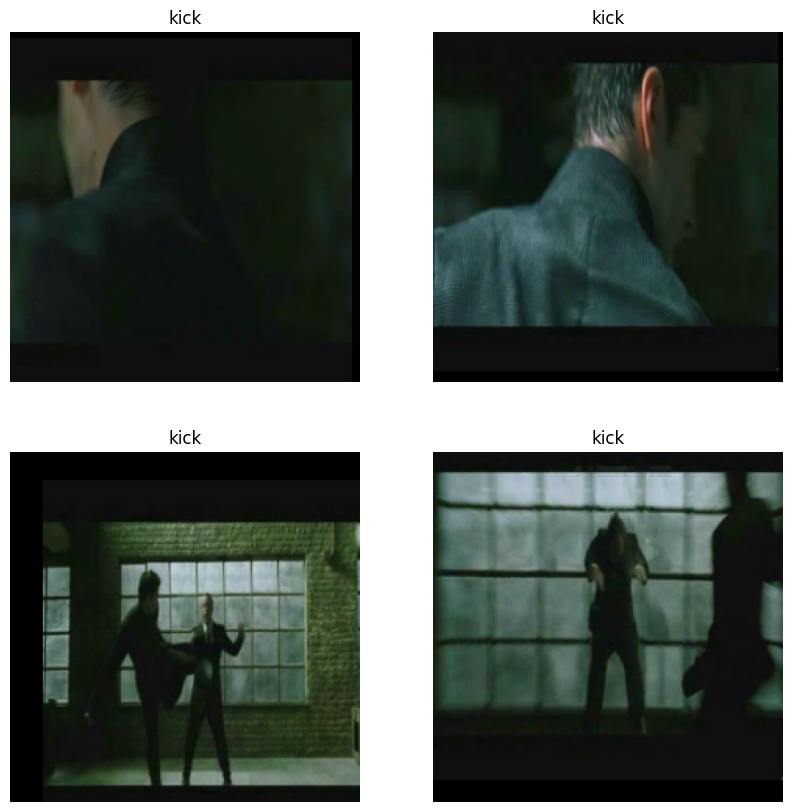

In [28]:
imgs = xb[0]
label = yb[0]
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(idx_to_label_dict[label.item()])
    plt.axis('off')

In [29]:
for xb,yb in test_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([1, 16, 3, 224, 224]) torch.Size([1])


In [30]:
from torch import nn
class Resnt18Rnn(nn.Module):
    def __init__(self, params_model):
        super(Resnt18Rnn, self).__init__()
        num_classes = params_model["num_classes"]
        dr_rate= params_model["dr_rate"]
        pretrained = params_model["pretrained"]
        rnn_hidden_size = params_model["rnn_hidden_size"]
        rnn_num_layers = params_model["rnn_num_layers"]
        
        baseModel = models.resnet18(pretrained=pretrained, progress=False)
        num_features = baseModel.fc.in_features
        baseModel.fc = Identity()
        self.baseModel = baseModel
        self.dropout= nn.Dropout(dr_rate)
        self.rnn = nn.LSTM(num_features, rnn_hidden_size, rnn_num_layers, batch_first= True)
        self.fc1 = nn.Linear(rnn_hidden_size, num_classes)
    def forward(self, x):
        b_z, ts, c, h, w = x.shape
        ii = 0
        y = self.baseModel((x[:,ii]))
        output, (hn, cn) = self.rnn(y.unsqueeze(1))
        for ii in range(1, ts):
            y = self.baseModel((x[:,ii]))
            out, (hn, cn) = self.rnn(y.unsqueeze(1), (hn, cn))
        out = self.dropout(out[:,-1])
        out = self.fc1(out) 
        return out 

In [31]:
from torch import nn
class GradCamModel(nn.Module):
    def __init__(self, params_model):
        super(GradCamModel, self).__init__()

        model_shits_1 = []
        model_shits_2 = []
        for i in range(timesteps):
            model = Resnt18Rnn(params_model)
            model.load_state_dict(torch.load("drive/MyDrive/ColabNotebooks/P lab/models/weights_"+model_type+"No_attention.pt"))
            baseModel = model.baseModel
            model_shits_1.append(nn.Sequential(*list(baseModel.children())[:-2]))
            model_shits_2.append(nn.Sequential(*list(baseModel.children())[-2:]))
        self.gradients = []
        self.model_shits_1 = nn.ModuleList(model_shits_1)
        self.model_shits_2 = nn.ModuleList(model_shits_2)
        self.rnn = model.rnn
        self.fc1 = model.fc1

    def activations_hook(self, grad):
        self.gradients.append(grad)
        
    def forward(self, x):
        b_z, ts, c, h, w = x.shape
        ii = 0

        y_1 = self.model_shits_1[ii]((x[:,ii]))

        h = y_1.register_hook(self.activations_hook)
        y = self.model_shits_2[ii]((y_1))
        y = y.view(b_z,-1)
#         print(y.shape)
        output, (hn, cn) = self.rnn(y.unsqueeze(1))
        for ii in range(1, ts):

            y_1 = self.model_shits_1[ii]((x[:,ii]))
            h = y_1.register_hook(self.activations_hook)
            y = self.model_shits_2[ii]((y_1))
            y = y.view(b_z,-1)
            out, (hn, cn) = self.rnn(y.unsqueeze(1), (hn, cn))
        out = self.fc1(out[:,-1]) 
        return out 
    
    # method for the gradient extraction
    def get_activations_gradient(self):
        return torch.stack(self.gradients, dim=2)
    
    # method for the activation exctraction
    def get_activations(self, x):
        ts = x.shape[1]
        ii = 0
        activations = []
        for ii in range(ts):
            activations.append(self.model_shits_1[ii]((x[:,ii])))
        return torch.stack(activations, dim=2)
    
    
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x

In [32]:
from torchvision import models
params_model={
        "num_classes": num_classes,
        "dr_rate": 0.1,
        "pretrained" : True,
        "rnn_num_layers": 1,
        "rnn_hidden_size": 100,}

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = 'cpu'

In [34]:
# y.requires_grad
def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    return x

In [38]:
a = iter(train_dl)
#xb = torch.load('clap_video')
model = GradCamModel(params_model)
torch.backends.cudnn.enabled = False
model = model.to(device)
model.eval()


xb, yb  = next(a)
xb=xb.to(device)
yb=yb.to(device)
output=model(xb)
print(idx_to_label_dict[output.argmax(dim=1).item()])

yb, output.argmax(dim=1), idx_to_label_dict[yb.item()], idx_to_label_dict[output.argmax(dim=1).item()]

golf


(tensor([3], device='cuda:0'), tensor([3], device='cuda:0'), 'golf', 'golf')

In [42]:
c = 4
activations = model.get_activations(xb).detach()
activations.shape

torch.Size([1, 512, 16, 7, 7])

In [43]:
model.zero_grad()
output[:,c].backward(retain_graph=True)
gradients = model.get_activations_gradient()
# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 3, 4])
print(gradients.shape, pooled_gradients.shape)
activations = model.get_activations(xb).detach()
channels, n_frames = activations.shape[1], activations.shape[2]
for i in range(channels):
    for j in range(n_frames):
        activations[:,i,j,:,:]*= pooled_gradients[i,j]
        
heatmap = torch.mean(activations, dim=1).squeeze().cpu()
heatmap = np.maximum(heatmap,0)
for i in range(n_frames):
    heatmap[i]/=torch.max(heatmap[i])
heatmap = heatmap.numpy()

torch.Size([1, 512, 16, 7, 7]) torch.Size([512, 16])


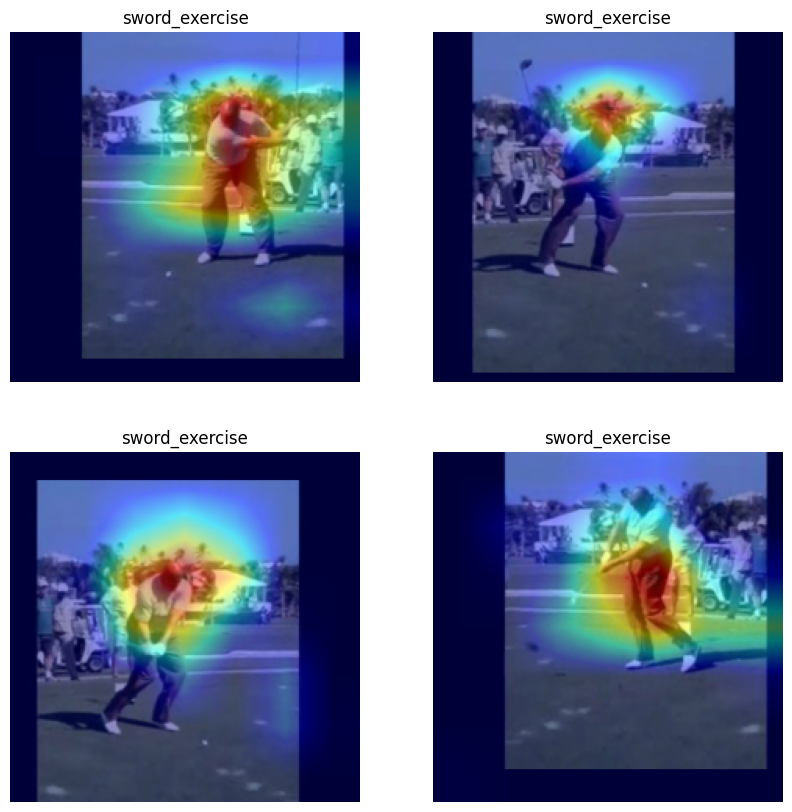

In [44]:
import cv2
import matplotlib
from torchvision.transforms.functional import to_pil_image
imgs = xb[0]
label = yb[0]

plt.figure(figsize=(10,10))
x = 0.004
# for ii,img in enumerate(imgs[8::2]):
count = 0
for ii in range(8,12):
    count+=1
    img_ = np.array(myutils.denormalize(imgs[ii].cpu(), mean, std))
#     plt.subplot(2,2,ii+1)
    plt.subplot(2,2,count)
    heatmap_ = cv2.resize(heatmap[ii], (img_.shape[1], img_.shape[0]))
    heatmap_ = np.uint8(255 * (1-heatmap_))
    heatmap_ = cv2.applyColorMap(heatmap_, cv2.COLORMAP_JET)
    
    superimposed_img = heatmap_ * 0.8 + img_
    superimposed_img = superimposed_img/np.max(superimposed_img)
#     cv2.imwrite('./map.jpg', superimposed_img)
    plt.axis('off')
    plt.imshow(superimposed_img)
    plt.title(idx_to_label_dict[4])
#     plt.colorbar()